In [1]:
%load_ext rpy2.ipython
import pandas as pd
import seaborn as sns
from pymer4.models import Lmer
from datetime import timedelta
import matplotlib.pyplot as plt
#from skimpy import skim


import matplotlib as mpl
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

c:\Users\chankalong\AppData\Local\Programs\Python\Python310\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [2]:
sst_data = pd.read_excel('combine_clean_sst.xlsx')
sst_data['year_month'] = sst_data['application_date'].dt.strftime('%Y-%m')
gender_choice = list(sst_data['gender'].unique())
edu_choice = list(sst_data['edu'].unique())
edu_choice.pop(1)
timepoint_choice = list(sst_data['timepoint'].unique())
sst_data_r = sst_data.drop(columns=['close_case_problem', 'Column35', 'Column36'])

nan

## Demographic

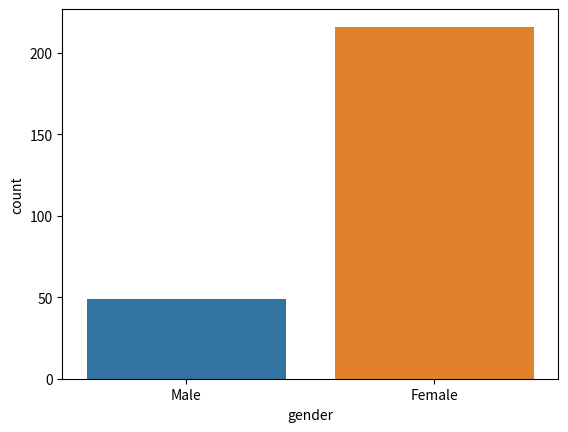

In [3]:
sns.countplot(x = 'gender', data = sst_data_r);

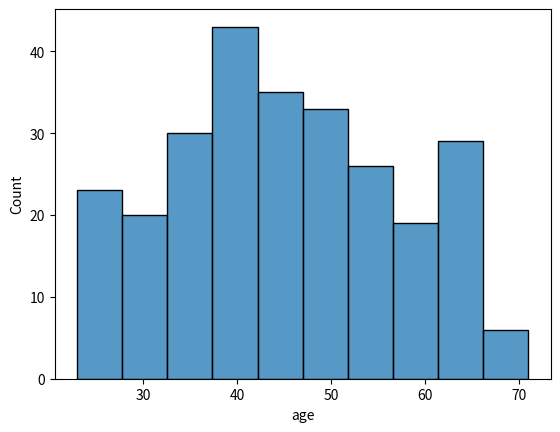

In [4]:
sns.histplot(x = 'age', data = sst_data_r);

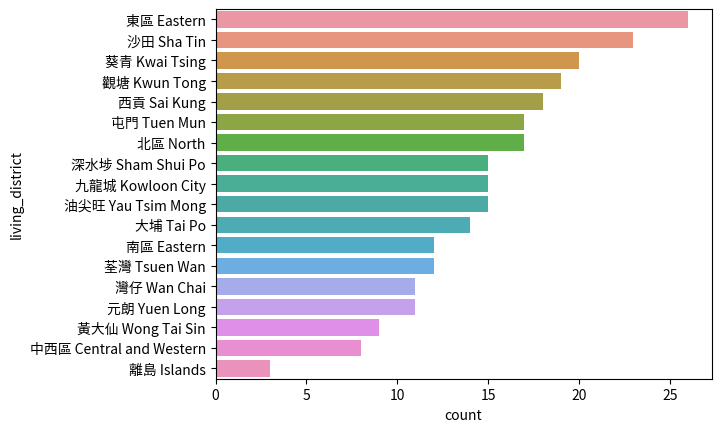

In [5]:
sns.countplot(y = 'living_district', data = sst_data_r, order = sst_data_r['living_district'].value_counts().index);

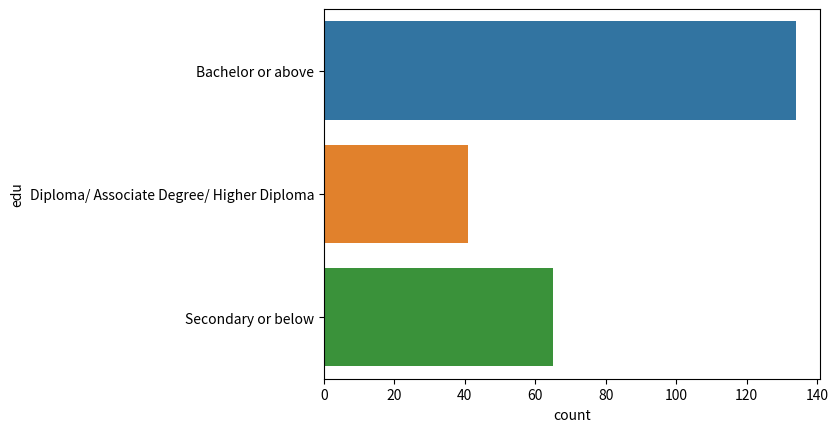

In [6]:
sns.countplot(y = 'edu', data = sst_data_r);
#plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

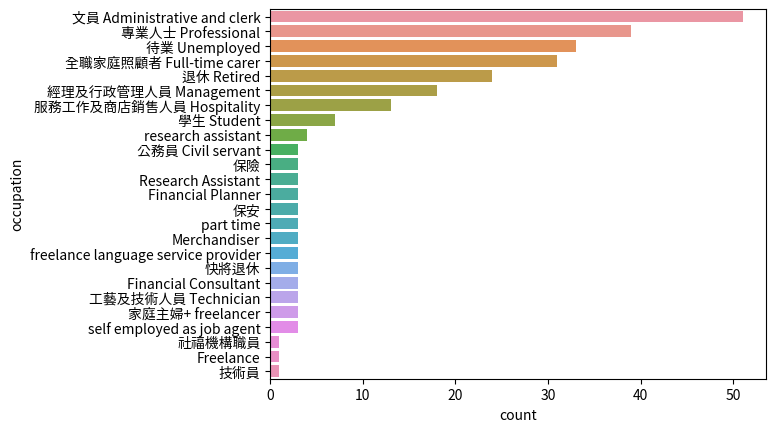

In [7]:
sns.countplot(y = 'occupation', data = sst_data_r, order = sst_data_r['occupation'].value_counts().index);

## Number of day from application to enquiry to service

In [8]:
print("application to service: " + str(timedelta(days=sst_data_r['service_application'].mean().round())))
print("enquiry to service: " + str(timedelta(days=sst_data_r['service_enquiry'].mean().round())))
print("application to enquiry: " + str(timedelta(days=sst_data_r['enquiry_application'].mean().round())))

application to service: 25 days, 0:00:00
enquiry to service: 19 days, 0:00:00
application to enquiry: 7 days, 0:00:00


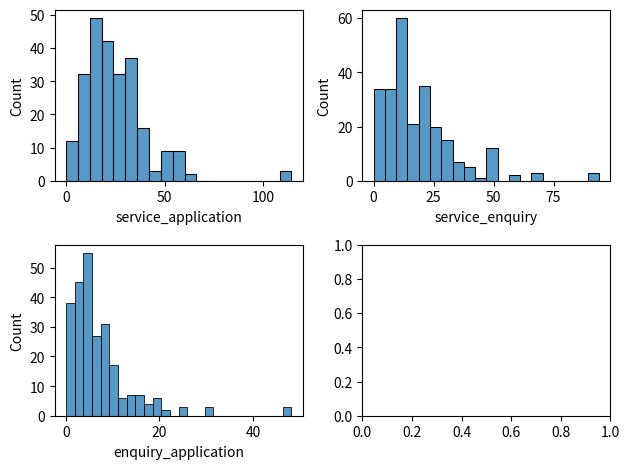

In [9]:
fig, ax = plt.subplots(2,2)
sns.histplot(x='service_application',data=sst_data_r, ax=ax[0,0]);
sns.histplot(x='service_enquiry',data=sst_data_r, ax=ax[0,1]);
sns.histplot(x='enquiry_application',data=sst_data_r, ax=ax[1,0]);
plt.tight_layout();

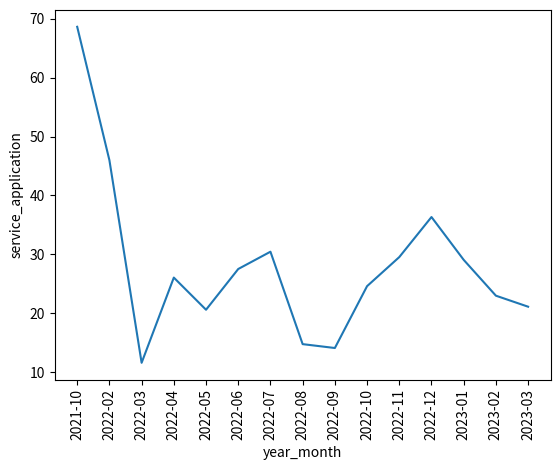

In [11]:
sst_data_r_plot = sst_data_r[sst_data_r['timepoint'] == '1st'].sort_values('year_month')
plot = sns.lineplot(x='year_month',y='service_application',data=sst_data_r_plot, ci=None)
plot.tick_params(axis='x', rotation=90)

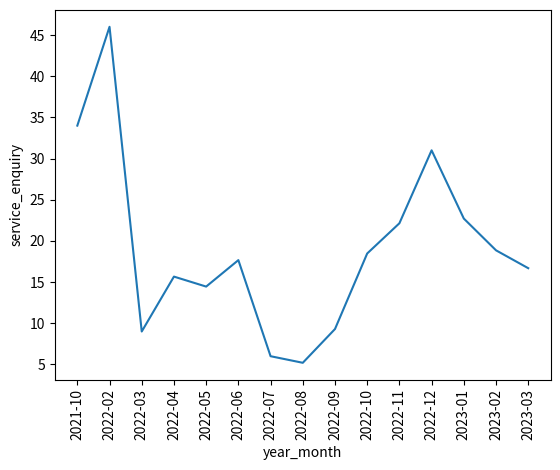

In [12]:
plot = sns.lineplot(x='year_month',y='service_enquiry',data=sst_data_r_plot, ci=None)
plot.tick_params(axis='x', rotation=90)

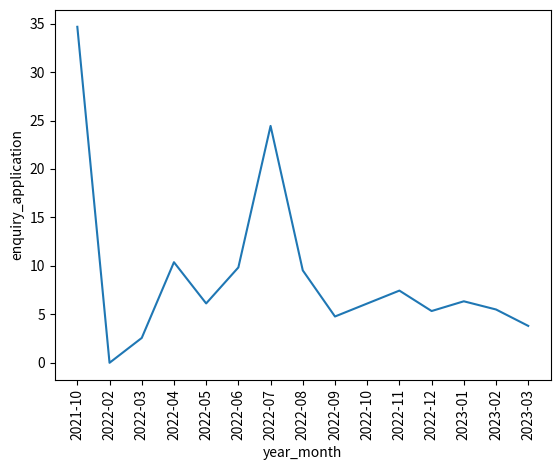

In [13]:
plot = sns.lineplot(x='year_month',y='enquiry_application',data=sst_data_r_plot, ci=None)
plot.tick_params(axis='x', rotation=90)

In [ ]:
model_goal = Lmer("goal_oriented ~ 1 + timepoint + (1 | email)", data=sst_data_r);
model_dominated = Lmer("dominated ~ 1 + timepoint + (1 | email)", data=sst_data_r);
model_confidence = Lmer("confidence ~ 1 + timepoint + (1 | email)", data=sst_data_r);
model_goal.fit();
model_dominated.fit();
model_confidence.fit();

## Analysis only include timepoint

In [15]:
print("Model of goal_oriented")
model_goal.coefs

print("Model of dominated")
model_dominated.coefs

print("Model of confidence")
model_confidence.coefs

Model of goal_oriented


,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),3.983253,3.632598,4.333907,0.178909,261.776258,22.264186,2.439873e-62,***
timepoint2nd,3.247358,2.696585,3.798131,0.281012,187.279839,11.555951,1.153601e-23,***
timepoint3rd,2.676295,2.079804,3.272786,0.304338,202.473407,8.793837,6.303588e-16,***


Model of dominated


,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),6.985545,6.641766,7.329325,0.175401,252.825384,39.826188,6.250048e-111,***
timepoint2nd,-1.419489,-1.928050,-0.910927,0.259475,183.031049,-5.470621,1.458202e-07,***
timepoint3rd,-2.447794,-3.001960,-1.893628,0.282743,194.026045,-8.657312,1.852970e-15,***


Model of confidence


,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),4.132763,3.825850,4.439675,0.156591,223.264068,26.392075,1.402184e-70,***
timepoint2nd,2.742483,2.330794,3.154172,0.210049,170.287054,13.056390,1.919058e-27,***
timepoint3rd,2.655327,2.204397,3.106258,0.230071,176.991667,11.541345,2.471674e-23,***


## Analysis include covariate
- number of session
- DASS
- age
- gender
- edu

### Influence of number of session

In [35]:
%%R -i sst_data_r
library(jtools)
library(tidyverse)

model_goal_session = lmerTest::lmer("goal_oriented ~ 1 + timepoint + session_number + timepoint * session_number + (1 | email)", data=sst_data_r)
model_dominated_session = lmerTest::lmer("dominated ~ 1 + timepoint + session_number + timepoint * session_number + (1 | email)", data=sst_data_r)
model_confidence_session = lmerTest::lmer("confidence ~ 1 + timepoint + session_number + timepoint * session_number + (1 | email)", data=sst_data_r)

print("Model of goal_oriented")
summ(model_goal_session)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()


print("Model of dominated")
summ(model_dominated_session)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()


print("Model of confidence")
summ(model_confidence_session)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()

[1] "Model of goal_oriented"
                              Est. t val.     p
(Intercept)                  3.649  5.079 0.000
timepoint2nd                 2.103  1.865 0.064
timepoint3rd                 3.075  2.460 0.015
session_number               0.198  1.093 0.276
timepoint2nd:session_number  0.185  0.662 0.509
timepoint3rd:session_number -0.217 -0.712 0.478
[1] "Model of dominated"
                              Est. t val.     p
(Intercept)                  7.674 10.917 0.000
timepoint2nd                -2.164 -2.090 0.038
timepoint3rd                -3.428 -2.961 0.004
session_number              -0.201 -1.136 0.258
timepoint2nd:session_number  0.189  0.737 0.463
timepoint3rd:session_number  0.273  0.969 0.334
[1] "Model of confidence"
                             Est. t val.     p
(Intercept)                 3.681  6.158 0.000
timepoint2nd                1.590  1.957 0.052
timepoint3rd                1.614  1.765 0.080
session_number              0.171  1.138 0.257
timepoint2nd:

### Influence of DASS-D

In [17]:
%%R -i sst_data_r
library(jtools)
library(tidyverse)
library(ggplot2)
library(emmeans)
library(easystats)
library(broom.mixed)

model_goal_dass_d = lmerTest::lmer("goal_oriented ~ 1 + timepoint + dass_d + timepoint * dass_d + (1 | email)", data=sst_data_r)
model_dominated_dass_d = lmerTest::lmer("dominated ~ 1 + timepoint + dass_d + timepoint * dass_d + (1 | email)", data=sst_data_r)
model_confidence_dass_d = lmerTest::lmer("confidence ~ 1 + timepoint + dass_d + timepoint * dass_d + (1 | email)", data=sst_data_r)

print("Model of goal_oriented")
summ(model_goal_dass_d)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()


print("Model of dominated")
summ(model_dominated_dass_d)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()


print("Model of confidence")
summ(model_confidence_dass_d)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()

[1] "Model of goal_oriented"
                      Est. t val.     p
(Intercept)          5.019 16.027 0.000
timepoint2nd         2.027  4.195 0.000
timepoint3rd         1.700  3.246 0.001
dass_d              -0.066 -4.026 0.000
timepoint2nd:dass_d  0.079  3.030 0.003
timepoint3rd:dass_d  0.059  1.988 0.048
[1] "Model of dominated"
                      Est. t val.     p
(Intercept)          6.325 20.851 0.000
timepoint2nd        -1.634 -3.686 0.000
timepoint3rd        -1.762 -3.644 0.000
dass_d               0.046  2.906 0.004
timepoint2nd:dass_d  0.012  0.516 0.607
timepoint3rd:dass_d -0.045 -1.622 0.107
[1] "Model of confidence"
                      Est. t val.     p
(Intercept)          4.924 18.776 0.000
timepoint2nd         2.211  6.232 0.000
timepoint3rd         1.983  5.098 0.000
dass_d              -0.056 -4.074 0.000
timepoint2nd:dass_d  0.040  2.080 0.039
timepoint3rd:dass_d  0.050  2.240 0.026


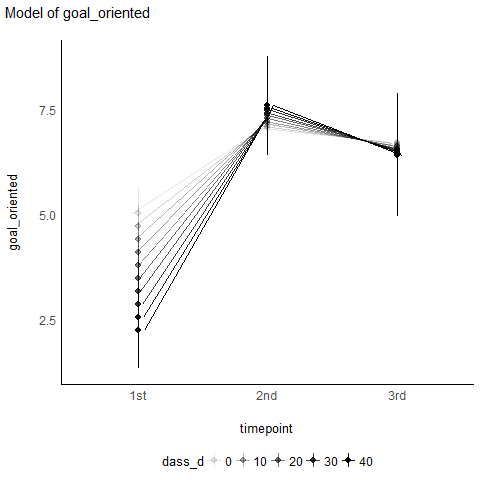

In [18]:
%%R -i sst_data_r
plt_model_goal_dass_d <- plot(estimate_means(model_goal_dass_d, at = c("timepoint", "dass_d"))) + ggtitle(paste("Model of goal_oriented")) + theme_modern(legend.position = "bottom")
plt_model_goal_dass_d$layers[[1]] <- NULL
plt_model_goal_dass_d

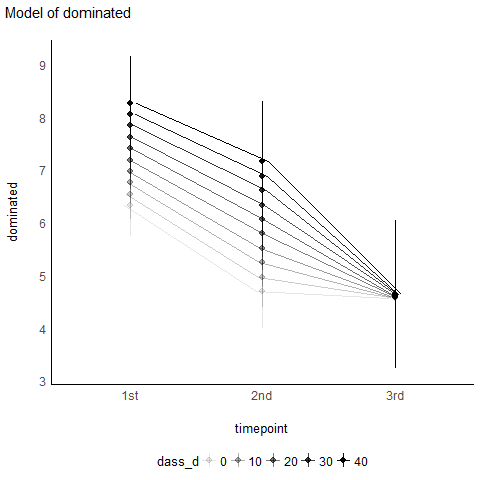

In [19]:
%%R -i sst_data_r
plt_model_dominated_dass_d <- plot(estimate_means(model_dominated_dass_d, at = c("timepoint", "dass_d"))) + ggtitle(paste("Model of dominated")) + theme_modern(legend.position = "bottom")
plt_model_dominated_dass_d$layers[[1]] <- NULL
plt_model_dominated_dass_d

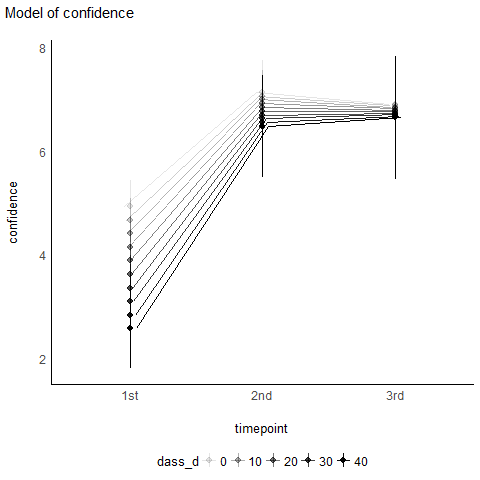

In [20]:
%%R -i sst_data_r
plt_model_confidence_dass_d <- plot(estimate_means(model_confidence_dass_d, at = c("timepoint", "dass_d"))) + ggtitle(paste("Model of confidence")) + theme_modern(legend.position = "bottom")
plt_model_confidence_dass_d$layers[[1]] <- NULL
plt_model_confidence_dass_d

### Influence of DASS-A

In [21]:
%%R -i sst_data_r

model_goal_dass_a = lmerTest::lmer("goal_oriented ~ 1 + timepoint + dass_a + timepoint * dass_a + (1 | email)", data=sst_data_r)
model_dominated_dass_a = lmerTest::lmer("dominated ~ 1 + timepoint + dass_a + timepoint * dass_a + (1 | email)", data=sst_data_r)
model_confidence_dass_a = lmerTest::lmer("confidence ~ 1 + timepoint + dass_a + timepoint * dass_a + (1 | email)", data=sst_data_r)

print("Model of goal_oriented")
summ(model_goal_dass_a)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()


print("Model of dominated")
summ(model_dominated_dass_a)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()


print("Model of confidence")
summ(model_confidence_dass_a)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()

[1] "Model of goal_oriented"
                      Est. t val.     p
(Intercept)          4.932 14.746 0.000
timepoint2nd         2.134  4.043 0.000
timepoint3rd         2.115  3.699 0.000
dass_a              -0.069 -3.358 0.001
timepoint2nd:dass_a  0.082  2.480 0.014
timepoint3rd:dass_a  0.035  0.943 0.347
[1] "Model of dominated"
                      Est. t val.     p
(Intercept)          6.120 18.939 0.000
timepoint2nd        -1.095 -2.290 0.023
timepoint3rd        -1.330 -2.550 0.012
dass_a               0.067  3.414 0.001
timepoint2nd:dass_a -0.028 -0.934 0.352
timepoint3rd:dass_a -0.083 -2.444 0.015
[1] "Model of confidence"
                      Est. t val.     p
(Intercept)          4.930 17.650 0.000
timepoint2nd         2.167  5.593 0.000
timepoint3rd         2.118  4.993 0.000
dass_a              -0.064 -3.748 0.000
timepoint2nd:dass_a  0.049  2.017 0.045
timepoint3rd:dass_a  0.045  1.634 0.104


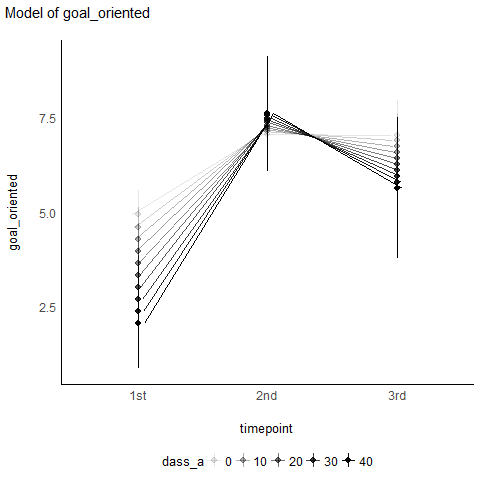

In [22]:
%%R -i sst_data_r
plt_model_goal_dass_a <- plot(estimate_means(model_goal_dass_a, at = c("timepoint", "dass_a"))) + ggtitle(paste("Model of goal_oriented")) + theme_modern(legend.position = "bottom")
plt_model_goal_dass_a$layers[[1]] <- NULL
plt_model_goal_dass_a

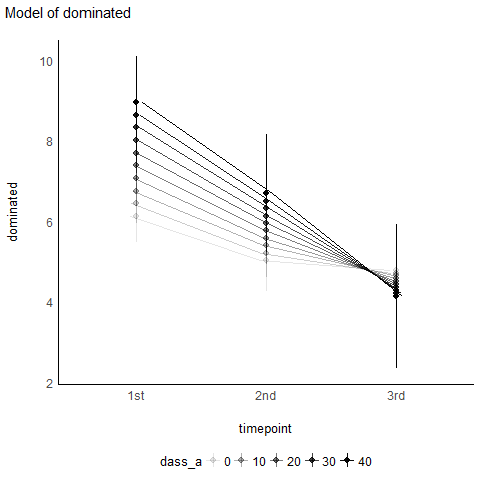

In [23]:
%%R -i sst_data_r
plt_model_dominated_dass_a <- plot(estimate_means(model_dominated_dass_a, at = c("timepoint", "dass_a"))) + ggtitle(paste("Model of dominated")) + theme_modern(legend.position = "bottom")
plt_model_dominated_dass_a$layers[[1]] <- NULL
plt_model_dominated_dass_a

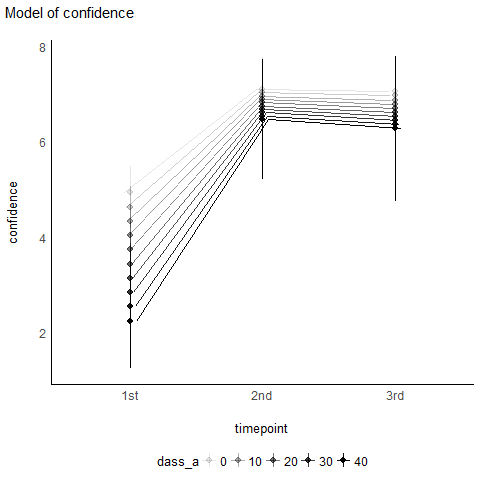

In [24]:
%%R -i sst_data_r
plt_model_confidence_dass_a <- plot(estimate_means(model_confidence_dass_a, at = c("timepoint", "dass_a"))) + ggtitle(paste("Model of confidence")) + theme_modern(legend.position = "bottom")
plt_model_confidence_dass_a$layers[[1]] <- NULL
plt_model_confidence_dass_a

### Influence of DASS-S

In [25]:
%%R -i sst_data_r

model_goal_dass_s = lmerTest::lmer("goal_oriented ~ 1 + timepoint + dass_s + timepoint * dass_s + (1 | email)", data=sst_data_r)
model_dominated_dass_s = lmerTest::lmer("dominated ~ 1 + timepoint + dass_s + timepoint * dass_s + (1 | email)", data=sst_data_r)
model_confidence_dass_s = lmerTest::lmer("confidence ~ 1 + timepoint + dass_s + timepoint * dass_s + (1 | email)", data=sst_data_r)

print("Model of goal_oriented")
summ(model_goal_dass_s)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()


print("Model of dominated")
summ(model_dominated_dass_s)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()


print("Model of confidence")
summ(model_confidence_dass_s)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()

[1] "Model of goal_oriented"
                      Est. t val.     p
(Intercept)          5.776 12.204 0.000
timepoint2nd         0.825  1.143 0.255
timepoint3rd         1.087  1.355 0.177
dass_s              -0.079 -4.080 0.000
timepoint2nd:dass_s  0.107  3.607 0.000
timepoint3rd:dass_s  0.067  1.965 0.051
[1] "Model of dominated"
                      Est. t val.     p
(Intercept)          5.700 12.311 0.000
timepoint2nd        -1.048 -1.557 0.121
timepoint3rd        -1.512 -2.007 0.046
dass_s               0.059  3.142 0.002
timepoint2nd:dass_s -0.019 -0.670 0.504
timepoint3rd:dass_s -0.041 -1.263 0.208
[1] "Model of confidence"
                      Est. t val.     p
(Intercept)          5.639 14.221 0.000
timepoint2nd         1.404  2.657 0.009
timepoint3rd         1.400  2.350 0.020
dass_s              -0.070 -4.327 0.000
timepoint2nd:dass_s  0.063  2.898 0.004
timepoint3rd:dass_s  0.059  2.332 0.021


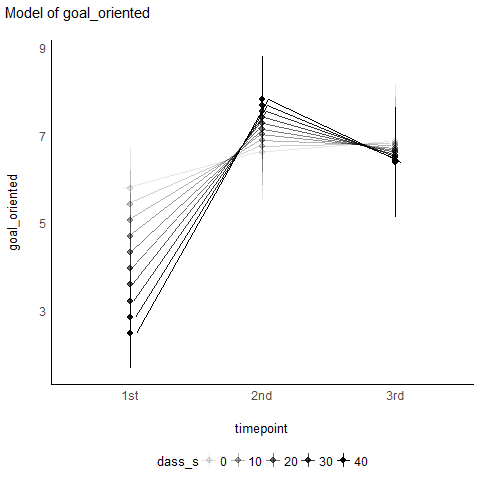

In [26]:
%%R -i sst_data_r
plt_model_goal_dass_s <- plot(estimate_means(model_goal_dass_s, at = c("timepoint", "dass_s"))) + ggtitle(paste("Model of goal_oriented")) + theme_modern(legend.position = "bottom")
plt_model_goal_dass_s$layers[[1]] <- NULL
plt_model_goal_dass_s

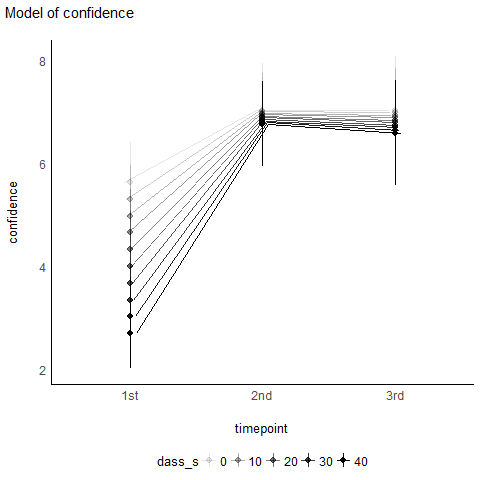

In [27]:
%%R -i sst_data_r
plt_model_confidence_dass_s <- plot(estimate_means(model_confidence_dass_s, at = c("timepoint", "dass_s"))) + ggtitle(paste("Model of confidence")) + theme_modern(legend.position = "bottom")
plt_model_confidence_dass_s$layers[[1]] <- NULL
plt_model_confidence_dass_s

### Influence of age

In [28]:
%%R -i sst_data_r

model_goal_age = lmerTest::lmer("goal_oriented ~ 1 + timepoint + age + timepoint * age + (1 | email)", data=sst_data_r)
model_dominated_age = lmerTest::lmer("dominated ~ 1 + timepoint + age + timepoint * age + (1 | email)", data=sst_data_r)
model_confidence_age = lmerTest::lmer("confidence ~ 1 + timepoint + age + timepoint * age + (1 | email)", data=sst_data_r)

print("Model of goal_oriented")
summ(model_goal_age)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()


print("Model of dominated")
summ(model_dominated_age)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()


print("Model of confidence")
summ(model_confidence_age)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()

[1] "Model of goal_oriented"
                   Est. t val.     p
(Intercept)       3.379  4.741 0.000
timepoint2nd      3.738  3.348 0.001
timepoint3rd      3.091  2.659 0.009
age               0.013  0.864 0.388
timepoint2nd:age -0.011 -0.457 0.649
timepoint3rd:age -0.009 -0.375 0.708
[1] "Model of dominated"
                   Est. t val.     p
(Intercept)       7.569 10.838 0.000
timepoint2nd     -1.934 -1.876 0.062
timepoint3rd     -2.826 -2.624 0.009
age              -0.013 -0.851 0.396
timepoint2nd:age  0.011  0.517 0.605
timepoint3rd:age  0.008  0.369 0.713
[1] "Model of confidence"
                   Est. t val.     p
(Intercept)       4.587  7.386 0.000
timepoint2nd      2.203  2.646 0.009
timepoint3rd      2.828  3.243 0.001
age              -0.011 -0.782 0.435
timepoint2nd:age  0.012  0.691 0.491
timepoint3rd:age -0.003 -0.177 0.860


### Influence of gender

In [29]:
%%R -i sst_data_r

model_goal_gender = lmerTest::lmer("goal_oriented ~ 1 + timepoint + gender + timepoint * gender + (1 | email)", data=sst_data_r)
model_dominated_gender = lmerTest::lmer("dominated ~ 1 + timepoint + gender + timepoint * gender + (1 | email)", data=sst_data_r)
model_confidence_gender = lmerTest::lmer("confidence ~ 1 + timepoint + gender + timepoint * gender + (1 | email)", data=sst_data_r)

print("Model of goal_oriented")
summ(model_goal_gender)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()


print("Model of dominated")
summ(model_dominated_gender)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()


print("Model of confidence")
summ(model_confidence_gender)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()

[1] "Model of goal_oriented"
                          Est. t val.     p
(Intercept)              4.071 20.460 0.000
timepoint2nd             3.245 10.369 0.000
timepoint3rd             2.695  7.990 0.000
genderMale              -0.463 -1.014 0.312
timepoint2nd:genderMale  0.011  0.015 0.988
timepoint3rd:genderMale -0.126 -0.158 0.874
[1] "Model of dominated"
                          Est. t val.     p
(Intercept)              7.023 35.934 0.000
timepoint2nd            -1.464 -5.123 0.000
timepoint3rd            -2.657 -8.569 0.000
genderMale              -0.197 -0.441 0.660
timepoint2nd:genderMale  0.241  0.365 0.715
timepoint3rd:genderMale  1.203  1.640 0.103
[1] "Model of confidence"
                          Est. t val.     p
(Intercept)              4.144 23.807 0.000
timepoint2nd             2.897 12.473 0.000
timepoint3rd             2.669 10.545 0.000
genderMale              -0.057 -0.142 0.887
timepoint2nd:genderMale -0.840 -1.562 0.120
timepoint3rd:genderMale -0.080 -0.133 0.

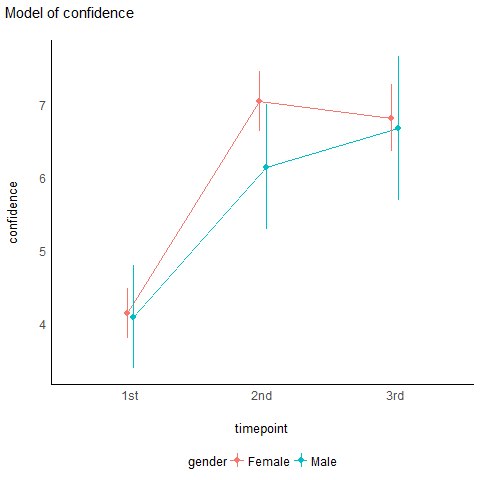

In [30]:
%%R -i sst_data_r
plt_model_confidence_gender <- plot(estimate_means(model_confidence_gender, at = c("timepoint", "gender"))) + ggtitle(paste("Model of confidence")) + theme_modern(legend.position = "bottom")
plt_model_confidence_gender$layers[[1]] <- NULL
plt_model_confidence_gender

### Influence of edu

In [31]:
%%R -i sst_data_r

model_goal_edu = lmerTest::lmer("goal_oriented ~ 1 + timepoint + edu + timepoint * edu + (1 | email)", data=sst_data_r)
model_dominated_edu = lmerTest::lmer("dominated ~ 1 + timepoint + edu + timepoint * edu + (1 | email)", data=sst_data_r)
model_confidence_edu = lmerTest::lmer("confidence ~ 1 + timepoint + edu + timepoint * edu + (1 | email)", data=sst_data_r)

print("Model of goal_oriented")
summ(model_goal_edu)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()


print("Model of dominated")
summ(model_dominated_edu)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()


print("Model of confidence")
summ(model_confidence_edu)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()

[1] "Model of goal_oriented"
                                                            Est. t val.     p
(Intercept)                                                4.102 15.797 0.000
timepoint2nd                                               3.107  7.777 0.000
timepoint3rd                                               2.897  6.621 0.000
eduDiploma/ Associate Degree/ Higher Diploma              -0.002 -0.003 0.997
eduSecondary or below                                     -0.269 -0.600 0.549
timepoint2nd:eduDiploma/ Associate Degree/ Higher Diploma -0.708 -0.853 0.395
timepoint3rd:eduDiploma/ Associate Degree/ Higher Diploma -0.555 -0.608 0.544
timepoint2nd:eduSecondary or below                         0.849  1.199 0.232
timepoint3rd:eduSecondary or below                        -0.231 -0.305 0.760
[1] "Model of dominated"
                                                            Est. t val.     p
(Intercept)                                                6.983 27.514 0.000
timepoint2

### Application to service

In [32]:
%%R -i sst_data_r

model_goal_service_application = lmerTest::lmer("goal_oriented ~ 1 + timepoint + service_application + timepoint * service_application + (1 | email)", data=sst_data_r)
model_dominated_service_application = lmerTest::lmer("dominated ~ 1 + timepoint + service_application + timepoint * service_application + (1 | email)", data=sst_data_r)
model_confidence_service_application = lmerTest::lmer("confidence ~ 1 + timepoint + service_application + timepoint * service_application + (1 | email)", data=sst_data_r)

print("Model of goal_oriented")
summ(model_goal_service_application)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()


print("Model of dominated")
summ(model_dominated_service_application)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()


print("Model of confidence")
summ(model_confidence_service_application)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()

[1] "Model of goal_oriented"
                                   Est. t val.     p
(Intercept)                       3.715 10.295 0.000
timepoint2nd                      3.204  5.888 0.000
timepoint3rd                      3.019  5.204 0.000
service_application               0.015  1.180 0.239
timepoint2nd:service_application -0.002 -0.112 0.911
timepoint3rd:service_application -0.019 -0.992 0.322
[1] "Model of dominated"
                                   Est. t val.     p
(Intercept)                       7.542 21.803 0.000
timepoint2nd                     -1.916 -3.925 0.000
timepoint3rd                     -2.493 -4.762 0.000
service_application              -0.020 -1.692 0.092
timepoint2nd:service_application  0.017  1.059 0.291
timepoint3rd:service_application  0.003  0.163 0.871
[1] "Model of confidence"
                                   Est. t val.     p
(Intercept)                       3.796 12.453 0.000
timepoint2nd                      2.671  6.729 0.000
timepoint3rd       

### Enquiry to service

In [33]:
%%R -i sst_data_r

model_goal_service_enquiry = lmerTest::lmer("goal_oriented ~ 1 + timepoint + service_enquiry + timepoint * service_enquiry + (1 | email)", data=sst_data_r)
model_dominated_service_enquiry = lmerTest::lmer("dominated ~ 1 + timepoint + service_enquiry + timepoint * service_enquiry + (1 | email)", data=sst_data_r)
model_confidence_service_enquiry = lmerTest::lmer("confidence ~ 1 + timepoint + service_enquiry + timepoint * service_enquiry + (1 | email)", data=sst_data_r)

print("Model of goal_oriented")
summ(model_goal_service_enquiry)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()


print("Model of dominated")
summ(model_dominated_service_enquiry)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()


print("Model of confidence")
summ(model_confidence_service_enquiry)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()

[1] "Model of goal_oriented"
                              Est. t val.     p
(Intercept)                  3.939 13.008 0.000
timepoint2nd                 3.116  6.876 0.000
timepoint3rd                 2.604  5.412 0.000
service_enquiry              0.007  0.535 0.593
timepoint2nd:service_enquiry 0.003  0.141 0.888
timepoint3rd:service_enquiry 0.000 -0.020 0.984
[1] "Model of dominated"
                               Est. t val.     p
(Intercept)                   7.195 24.658 0.000
timepoint2nd                 -1.733 -4.234 0.000
timepoint3rd                 -2.302 -5.270 0.000
service_enquiry              -0.010 -0.822 0.412
timepoint2nd:service_enquiry  0.015  0.937 0.350
timepoint3rd:service_enquiry -0.009 -0.496 0.620
[1] "Model of confidence"
                               Est. t val.     p
(Intercept)                   3.771 14.612 0.000
timepoint2nd                  2.824  8.534 0.000
timepoint3rd                  2.751  7.752 0.000
service_enquiry               0.018  1.701 0.

### Application to enquiry

In [34]:
%%R -i sst_data_r

model_goal_enquiry_application = lmerTest::lmer("goal_oriented ~ 1 + timepoint + enquiry_application + timepoint * enquiry_application + (1 | email)", data=sst_data_r)
model_dominated_enquiry_application = lmerTest::lmer("dominated ~ 1 + timepoint + enquiry_application + timepoint * enquiry_application + (1 | email)", data=sst_data_r)
model_confidence_enquiry_application = lmerTest::lmer("confidence ~ 1 + timepoint + enquiry_application + timepoint * enquiry_application + (1 | email)", data=sst_data_r)

print("Model of goal_oriented")
summ(model_goal_enquiry_application)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()


print("Model of dominated")
summ(model_dominated_enquiry_application)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()


print("Model of confidence")
summ(model_confidence_enquiry_application)$coeftable %>% round(3) %>% as.data.frame() %>% select(-S.E., -d.f.) %>% print()

[1] "Model of goal_oriented"
                                   Est. t val.     p
(Intercept)                       3.496 13.587 0.000
timepoint2nd                      3.519  8.692 0.000
timepoint3rd                      3.169  7.072 0.000
enquiry_application               0.071  2.609 0.010
timepoint2nd:enquiry_application -0.041 -1.009 0.314
timepoint3rd:enquiry_application -0.076 -1.806 0.072
[1] "Model of dominated"
                                   Est. t val.     p
(Intercept)                       7.398 29.714 0.000
timepoint2nd                     -1.465 -3.943 0.000
timepoint3rd                     -2.415 -5.827 0.000
enquiry_application              -0.050 -1.887 0.060
timepoint2nd:enquiry_application -0.002 -0.042 0.967
timepoint3rd:enquiry_application  0.002  0.054 0.957
[1] "Model of confidence"
                                   Est. t val.     p
(Intercept)                       3.763 17.246 0.000
timepoint2nd                      2.924  9.751 0.000
timepoint3rd       